In [1]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [2]:
!nvidia-smi

Sat Apr 12 02:53:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 79.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Dataset

In [5]:
from roboflow import download_dataset
dataset = download_dataset('https://universe.roboflow.com/roboflow-100/circuit-voltages/dataset/2', 'yolov8')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to circuit-voltages-2 in yolov8:: 100%|██████████| 276/276 [00:00<00:00, 5778.55it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


In [6]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [8]:
!cat {dataset.location}/data.yaml

names:
- GND
- IDC
- IDC_I
- R
- VDC
- VDC_I
nc: 6
roboflow:
  license: CC BY 4.0
  project: circuit-voltages
  url: https://universe.roboflow.com/roboflow-100/circuit-voltages/dataset/2
  version: 2
test: ../test/images
train: ../train/images
val: ../valid/images


### yolov12n, yolov12s, yolov12m

In [65]:
!rm -rf /content/runs/detect

#### Fine-tune

In [9]:
from ultralytics import YOLO

model = YOLO('yolov12m.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=100)

New https://pypi.org/project/ultralytics/8.3.107 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12m.yaml, data=/content/circuit-voltages-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

100%|██████████| 755k/755k [00:00<00:00, 57.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2, 1, 2]         
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    147968  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2, 1, 4]        
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2664960  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 268MB/s]


AMP: checks passed ✅


train: Scanning /content/circuit-voltages-2/train/labels... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1960.26it/s]

train: New cache created: /content/circuit-voltages-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/circuit-voltages-2/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1469.05it/s]

val: New cache created: /content/circuit-voltages-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0005), 137 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.6G      5.672      5.876      4.431        115        640: 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.9G      5.545      5.792      4.426        100        640: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.3G      5.394      5.549      4.312        106        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.1G      5.293      5.323      4.162        123        640: 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.1G      5.025      5.048      4.007        114        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        12G        4.5      4.383      3.882        108        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        12G      4.225      4.185      3.623        111        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        12G      4.077       3.86      3.411        119        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.1G      3.565       3.58      3.348         93        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        12G      3.657       3.38      3.052        132        640: 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        12G      3.373      3.245      3.135         95        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.9G      3.293      3.023      2.867        116        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        12G      3.174      2.768      2.642        137        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        12G      3.021      2.633      2.587        121        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        12G      2.801      2.477      2.555         90        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        12G      2.862      2.344      2.478         87        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        12G      2.792      2.165      2.327        137        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.9G       2.71      2.162      2.256        117        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        12G      2.663      2.119      2.228        112        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        12G      2.635      2.045      2.196        123        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         25        132     0.0492     0.0101     0.0266     0.0093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        12G      2.575      1.959      2.204        117        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         25        132     0.0321     0.0424     0.0217    0.00953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        12G      2.507      1.924      2.139        106        640: 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.861     0.0799     0.0933     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        12G       2.43      1.841      2.062        121        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132      0.927     0.0441     0.0832     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.1G        2.4      1.726       1.99        136        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         25        132     0.0175      0.197     0.0261     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.9G      2.389      1.736      2.061         95        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         25        132      0.017      0.232     0.0364     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        12G      2.332      1.688      1.955         78        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         25        132      0.506      0.125      0.091     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        12G      2.314      1.699      1.952        127        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132      0.854     0.0601      0.138     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.1G      2.244      1.593      1.878        115        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         25        132      0.529      0.134       0.18     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        12G      2.273      1.602      1.923        132        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         25        132      0.538      0.103      0.176     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.9G      2.254       1.52       1.86        128        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132      0.473      0.257      0.267     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        12G      2.265      1.591       1.82        135        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         25        132       0.53      0.327      0.343      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        12G      2.177      1.514      1.799        119        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         25        132      0.738      0.476      0.472      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        12G      2.201      1.445      1.786        184        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132      0.737      0.502       0.51      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        12G      2.195      1.489      1.844        106        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132      0.652      0.611      0.643      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        12G      2.168      1.433      1.802         76        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.612      0.637      0.671      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        12G      2.194      1.466      1.823        129        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         25        132      0.539      0.554      0.589      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        12G      2.164      1.403      1.789        125        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132      0.525      0.586      0.573      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        12G      2.174      1.413      1.668        150        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         25        132      0.503      0.618      0.581      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        12G      2.106      1.364      1.713        138        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         25        132      0.571      0.611      0.603      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.9G      2.134      1.339       1.65        149        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25        132      0.593      0.592      0.612      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.9G       2.02      1.322      1.644        125        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         25        132      0.551      0.598      0.542      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        12G      2.089      1.349      1.742         96        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.421      0.616      0.568      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        12G      2.091      1.312      1.736         94        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         25        132      0.403      0.571      0.539      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        12G       2.14      1.309      1.702         89        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132      0.496      0.573      0.579      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        12G       2.04      1.254      1.656        103        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         25        132      0.574      0.719      0.659      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        12G      2.027      1.262      1.658        113        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         25        132      0.579      0.677      0.659      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        12G      2.096      1.216      1.623        170        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         25        132      0.546      0.619       0.64      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        12G      2.032      1.213       1.62        124        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132      0.555       0.63      0.685      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        12G      1.982      1.246      1.639         97        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132      0.513       0.67      0.679      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        12G      2.021      1.176      1.596        127        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         25        132      0.641      0.713      0.704      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        12G      1.979      1.186      1.575        156        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25        132      0.563      0.643      0.609      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        12G      2.019      1.193      1.656        128        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         25        132      0.565      0.739      0.642      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        12G      2.031      1.181       1.65        129        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         25        132      0.599      0.705      0.658      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        12G       2.08      1.185      1.663        127        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         25        132      0.614      0.737       0.68      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.9G      1.982      1.162      1.647        105        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         25        132      0.569      0.602      0.629      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.1G      1.981      1.205      1.682        108        640: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132      0.577      0.633      0.669      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.1G      1.928      1.137      1.599        136        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         25        132      0.599      0.583      0.681       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        12G      1.993      1.174      1.552        112        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         25        132      0.623       0.58      0.654      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.9G      1.992      1.155       1.62        122        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.636      0.572      0.659      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        12G      1.962      1.126      1.593        143        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         25        132      0.695      0.749      0.701      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.3G      1.927      1.085      1.527        131        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         25        132      0.659      0.772      0.698      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.1G      1.939      1.115      1.557        119        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         25        132      0.515      0.719      0.653      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        12G      1.884      1.067      1.541        134        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         25        132      0.662      0.582      0.706      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        12G      1.909      1.111      1.553         94        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         25        132      0.526       0.71      0.671      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.3G      1.885      1.092      1.601        129        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         25        132      0.517      0.691      0.657       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        12G      1.918       1.12      1.598         96        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         25        132      0.579      0.757      0.668      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.3G      1.906      1.094       1.54        140        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25        132        0.6      0.752       0.69      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        12G      1.903      1.093      1.516        110        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         25        132      0.663      0.738      0.727      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.3G      1.901      1.079      1.547        104        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132      0.664      0.762      0.736      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        12G      1.897       1.06      1.531        131        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         25        132      0.638      0.788       0.73       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.3G      1.888      1.076       1.52         99        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25        132      0.635      0.816      0.736      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        12G      1.906      1.083       1.49        131        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25        132       0.67      0.815      0.749      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        12G      1.932      1.073       1.54        149        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         25        132      0.733      0.773      0.765      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        12G      1.889      1.062        1.5        128        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         25        132      0.645      0.675      0.707      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.3G      1.854      1.025       1.48        110        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.575       0.74      0.724      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        12G      1.835      1.035      1.551        118        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         25        132      0.681      0.796      0.736      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.3G      1.831      1.019      1.518         98        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         25        132      0.695      0.769      0.711      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        12G      1.931      1.046      1.484        114        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132      0.701      0.736      0.707      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.3G      1.857      1.023      1.499        142        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         25        132      0.677      0.794      0.736      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        12G      1.839      1.009      1.484        133        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         25        132      0.664      0.762      0.708      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.3G      1.775      1.008      1.414        119        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25        132      0.682       0.77      0.723      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        12G      1.822          1      1.486         92        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         25        132      0.649      0.775      0.715      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.3G       1.83      1.019      1.498        121        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         25        132      0.636      0.777      0.739      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        12G      1.884      1.033      1.474        138        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132      0.639      0.773      0.739      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        12G      1.852     0.9976      1.506         97        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132      0.641      0.796      0.746      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.1G      1.799     0.9979      1.524        123        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         25        132      0.621      0.817      0.738      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        12G      1.835     0.9936      1.455        149        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         25        132      0.633      0.821      0.735      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        12G      1.797     0.9891      1.485        139        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         25        132      0.639      0.781      0.719      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        12G      1.808     0.9973      1.439        144        640: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         25        132      0.698      0.709      0.714      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        12G      1.828      1.008      1.501        108        640: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25        132      0.717      0.742      0.737      0.318


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        12G      1.775      1.131      1.562         58        640: 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         25        132      0.729      0.754      0.752      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        12G      1.784      1.094      1.555         70        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         25        132      0.797      0.722      0.788       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        12G      1.779      1.041      1.508         55        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         25        132      0.813       0.72      0.783      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        12G      1.778      1.041      1.537         64        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         25        132      0.781      0.732      0.794      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        12G      1.754       1.06      1.555         57        640: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         25        132      0.785      0.721      0.793      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        12G      1.763      1.039      1.585         62        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         25        132      0.727      0.757      0.797      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        12G      1.772      1.006      1.559         61        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         25        132      0.728      0.756      0.793      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.1G      1.781      1.012      1.567         59        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         25        132      0.707      0.757      0.794      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        12G      1.744      1.008      1.525         59        640: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         25        132       0.71      0.741      0.792       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.1G      1.769     0.9795      1.531         57        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         25        132      0.691      0.752      0.778      0.369



100 epochs completed in 0.200 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 39.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 39.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 402 layers, 19,581,154 parameters, 0 gradients, 59.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


                   all         25        132      0.692      0.752      0.777      0.369
                   GND         15         15      0.739      0.569      0.735       0.26
                   IDC          6          8      0.675        0.5      0.616      0.276
                 IDC_I          2          2      0.288        0.5      0.513      0.258
                     R         25         73      0.911      0.986      0.975      0.383
                   VDC         22         30      0.762       0.96      0.878       0.53
                 VDC_I          4          4      0.775          1      0.945      0.507
Speed: 0.2ms preprocess, 9.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


#### Evalueate on train

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1744426912.8b44f5623bdc.2672.0  train_batch2.jpg
F1_curve.png					    train_batch540.jpg
labels_correlogram.jpg				    train_batch541.jpg
labels.jpg					    train_batch542.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


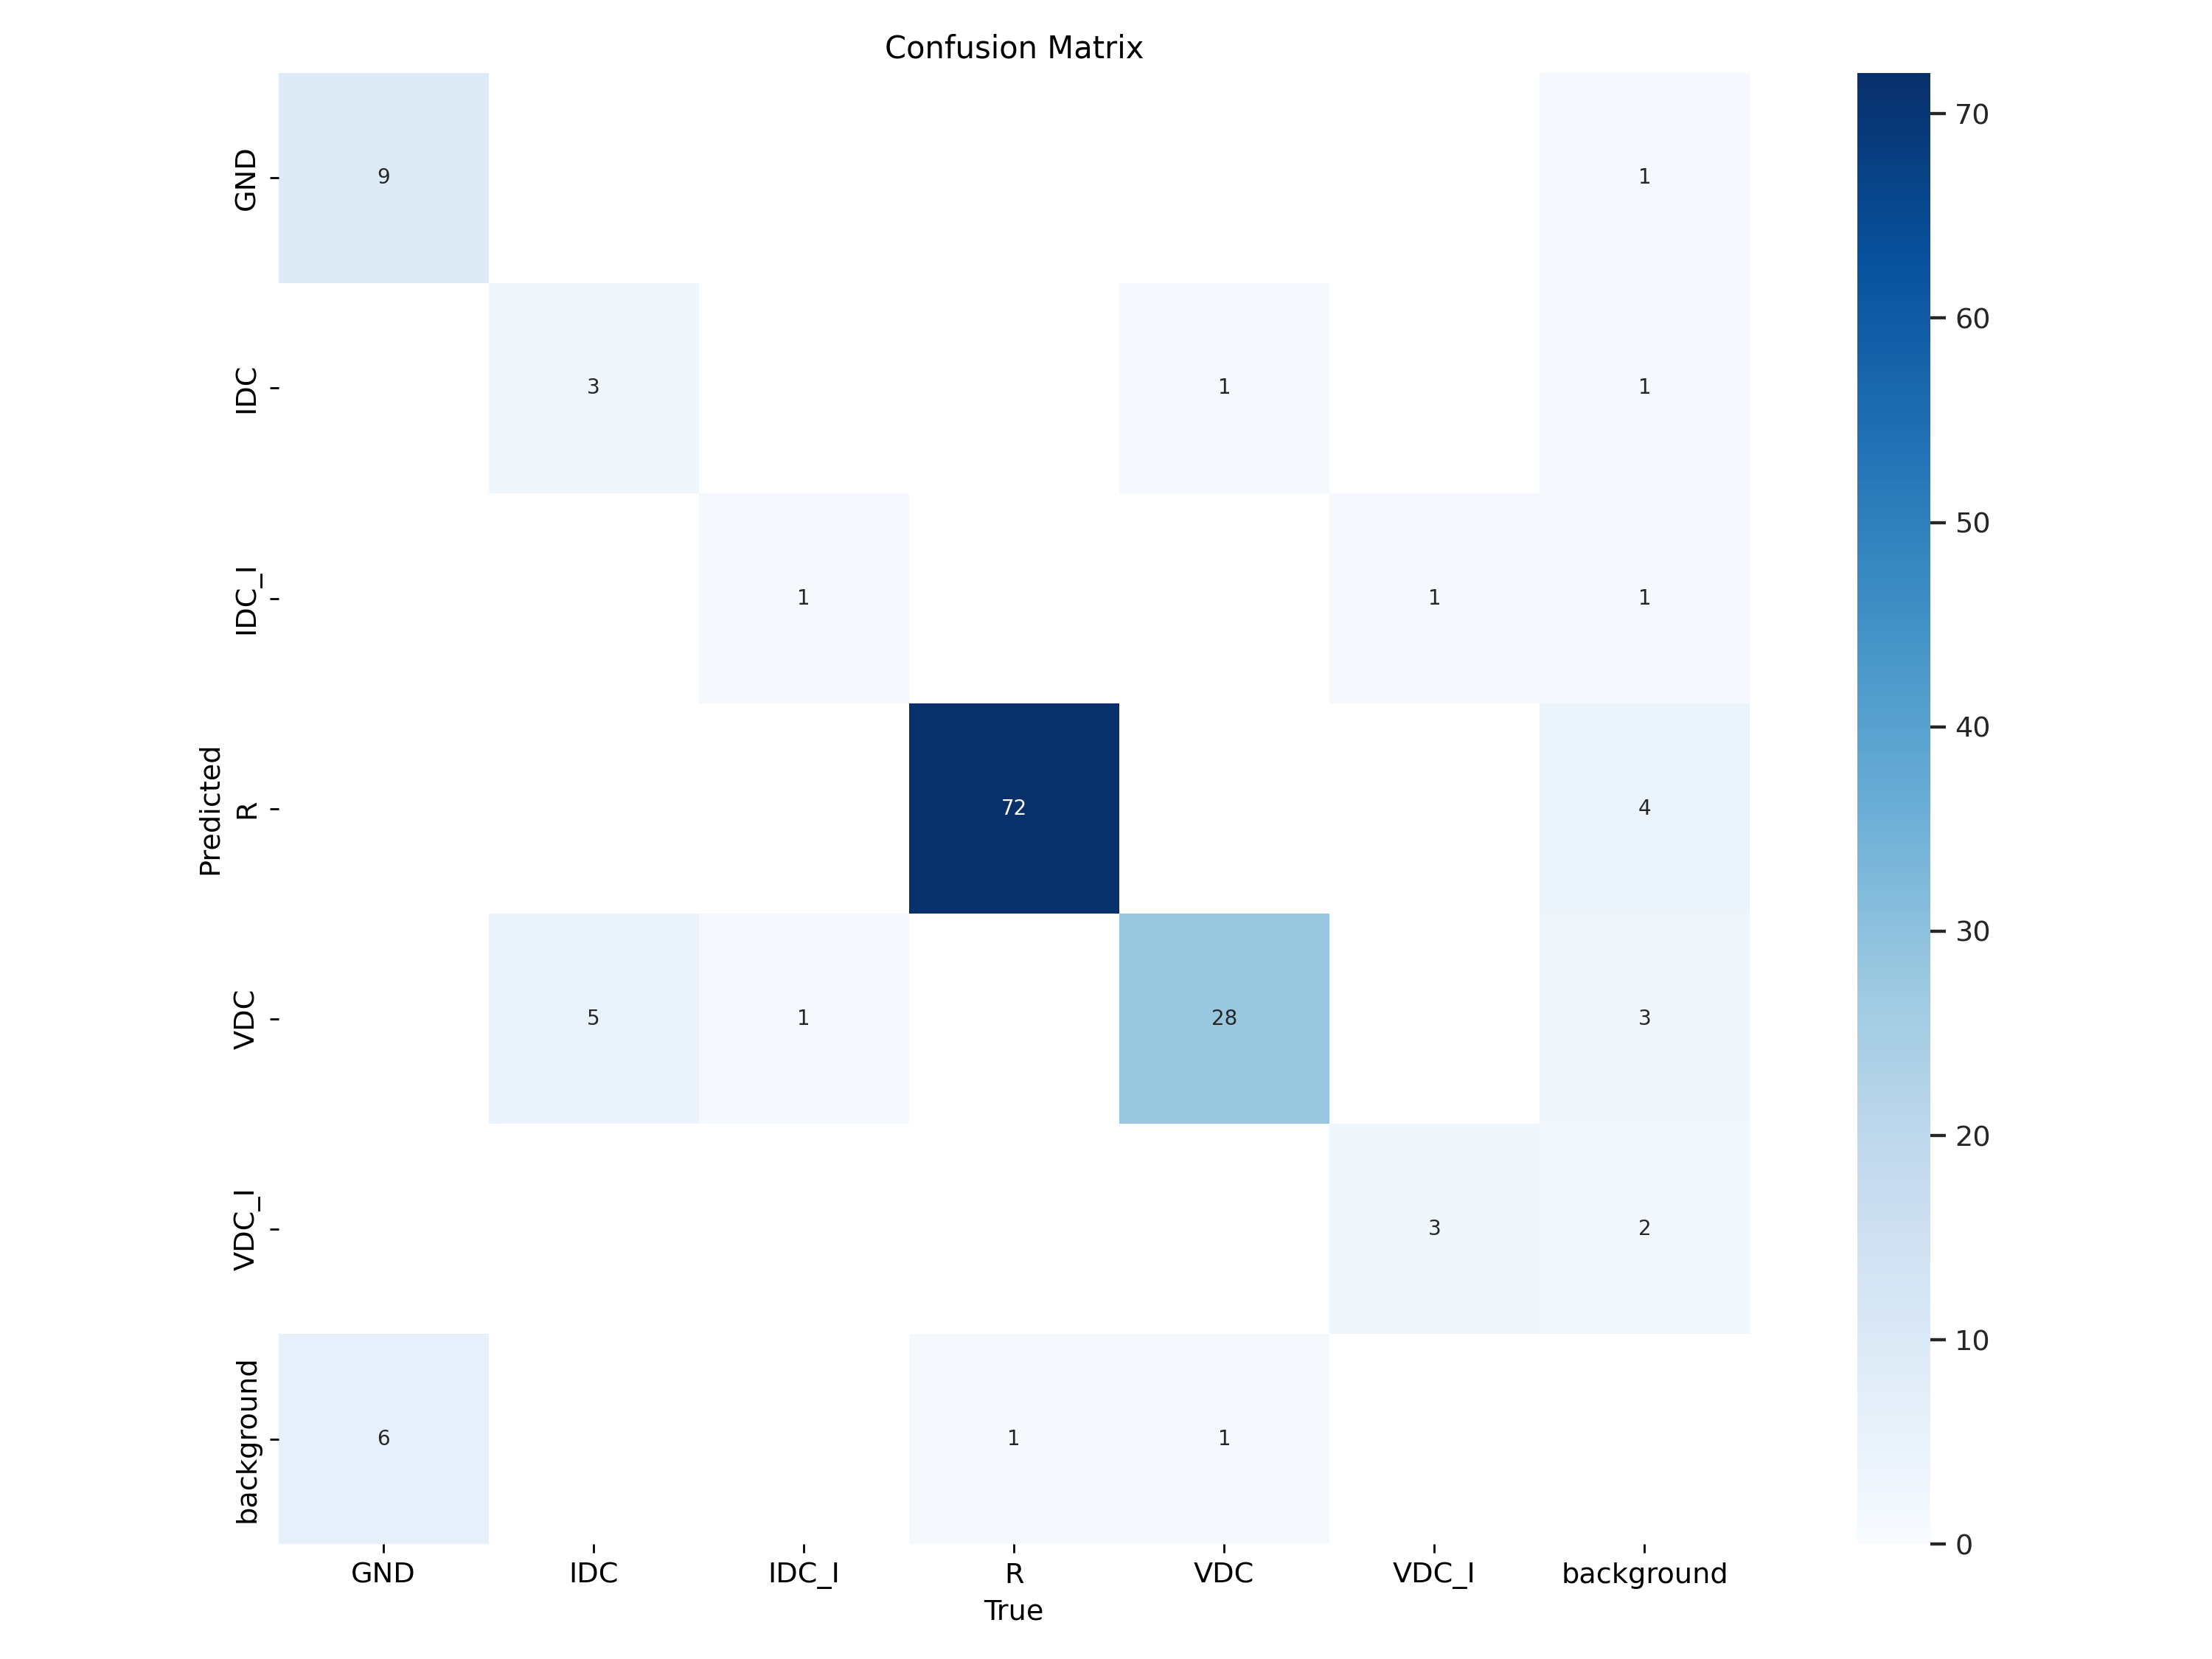

In [11]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

#### Evaluate on test

In [12]:
save_dir = f"{HOME}/runs/detect/test"
os.makedirs(save_dir, exist_ok=True)


In [13]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['GND', 'IDC', 'IDC_I', 'R', 'VDC', 'VDC_I']

In [14]:
import torch
from thop import profile

def compute_flops(model, input_size=640):

    # Create dummy input (same device as Latency tests)
    dummy_input = torch.randn(1, 3, input_size, input_size).to(model.device)

    # Calculate FLOPs using thop
    flops, params = profile(model.model, inputs=(dummy_input,), verbose=False)
    flops_g = flops / 1e9  # Convert to GigaFLOPs

    return flops, flops_g

# Initialize model
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

# Compute FLOPs
total_flops, flops_g = compute_flops(model)

In [15]:
flops_g

30.0564736

In [ ]:
from supervision.metrics import MeanAveragePrecision
import time

predictions = []
targets = []
latencies = []

for _, image, target in ds:
    start_time = time.time()
    results = model(image, verbose=False)[0]
    end_time = time.time()

    latency_ms = (end_time - start_time) * 1000
    latencies.append(latency_ms)

    detections = sv.Detections.from_ultralytics(results)
    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()
mAP50 = map.map50
mAP50_95 = map.map50_95
mAP75 = map.map75

mAP50_Small = map.small_objects.map50
mAP50_95_Small = map.small_objects.map50_95
mAP75_Small = map.small_objects.map75

mAP50_Medium = map.medium_objects.map50
mAP50_95_Medium = map.medium_objects.map50_95
mAP75_Medium = map.medium_objects.map75

mAP50_Large = map.large_objects.map50
mAP50_95_Large = map.large_objects.map50_95
mAP75_Large = map.large_objects.map75

avg_latency = sum(latencies) / len(latencies)
min_latency = min(latencies)
max_latency = max(latencies)

print("\n===== Model Evaluation =====")
print(f"mAP50: {mAP50:.4f}")
print(f"mAP50-95: {mAP50_95:.4f}")
print(f"mAP75: {mAP75:.4f}")
print(f"\nFLOPs: {flops_g} G")  
print(f"\nAverage Latency: {avg_latency:.2f} ms")
print(f"Min Latency: {min_latency:.2f} ms")
print(f"Max Latency: {max_latency:.2f} ms")
print("=======================")


===== Model Evaluation =====
mAP50: 0.8808
mAP50-95: 0.4023
mAP75: 0.2626

FLOPs: 30.0564736 G

Average Latency: 62.80 ms
Min Latency: 21.06 ms
Max Latency: 484.46 ms


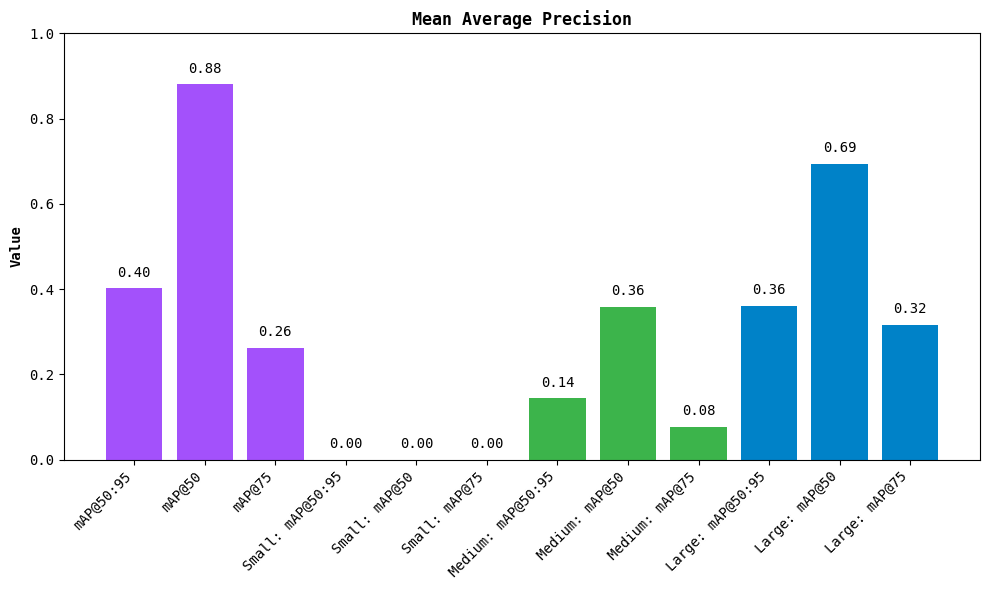

In [17]:
map.plot()

In [18]:
import json
import os

metrics = {
    "mAP50": float(mAP50),
    "mAP50_95": float(mAP50_95),
    "mAP75": float(mAP75),
    'mAP50_Small': float(mAP50_Small),
    'mAP50_95_Small': float(mAP50_95_Small),
    'mAP75_Small': float(mAP75_Small),
    'mAP50_Medium': float(mAP50_Medium),
    'mAP50_95_Medium': float(mAP50_95_Medium),
    'mAP75_Medium': float(mAP75_Medium),
    'mAP50_Large': float(mAP50_Large),
    'mAP50_95_Large': float(mAP50_95_Large),
    'mAP75_Large': float(mAP75_Large),
    "FLOPs_G": float(flops_g),
    "Latency_ms": {
        "average": float(avg_latency),
        "min": float(min_latency),
        "max": float(max_latency)
    }
}

save_path = os.path.join(save_dir, 'metrics.json')
with open(save_path, 'w') as f:
    json.dump(metrics, f, indent=2)

print(f"✅ {save_path}")

✅ /content/runs/detect/test/metrics.json
